# Recorrido por Niveles (Level Order) en Árboles Binarios

El recorrido por niveles, también conocido como búsqueda por amplitud (BFS, por sus siglas en inglés), es un método para recorrer o buscar en un árbol binario nivel por nivel. Este recorrido empieza en la raíz y explora todos los vecinos de estos nodos en el árbol antes de pasar a los nodos en el siguiente nivel de profundidad.

- **Concepto de Recorrido por Niveles:**
  - Comenzar desde la raíz del árbol binario.
  - Visitar todos los nodos en un nivel antes de pasar al nivel siguiente.
  - Repetir el proceso hasta que todos los niveles hayan sido recorridos.

- **Aplicaciones del Recorrido por Niveles:**
  - En la serialización y deserialización de un árbol binario.
  - Para encontrar la altura mínima de un árbol binario.
  - Útil en algoritmos de búsqueda de anchura primero en gráficos representados por árboles.

- **Implementación en Python:**
  - La implementación típica de un recorrido por niveles en árboles binarios utiliza una cola para mantener el orden de visita de los nodos.

## Implementación en Python

Aquí te muestro cómo implementar este método en la clase [`BinaryTree`](src/BinaryTree.py): 

In [1]:
# Código utilitario
from src.visualization import visualize_bt
from src.BinaryTree import BinaryTree

In [2]:
from collections import deque

def level_order_traversal(self):
    """
    Realiza el recorrido por niveles del árbol binario.

    Empleando una cola, este método visita los nodos de cada nivel de izquierda
    a derecha antes de pasar al siguiente nivel.

    Retorna:
        Una lista con los datos de los nodos siguiendo el orden del recorrido
        por niveles.
    """
    # Comprueba si la raíz está vacía; de ser así, regresa una lista vacía ya
    # que no hay nada que recorrer.
    if not self.root:
        return []

    # Inicializa la lista de resultados y una cola para mantener el control de
    # los nodos a visitar.
    result, queue = [], deque([self.root])

    # Mientras hayan nodos en la cola.
    while queue:
        # Extrae el siguiente nodo de la cola.
        node = queue.popleft()
        # Añade el dato del nodo actual a la lista de resultados.
        result.append(node.data)

        # Si el nodo actual tiene un hijo izquierdo, lo añade a la cola para
        # visitarlo más tarde.
        if node.left:
            queue.append(node.left)
        # Si el nodo actual tiene un hijo derecho, también lo añade a la cola.
        if node.right:
            queue.append(node.right)

    # Una vez terminado el recorrido, regresa la lista con el resultado.
    return result

# Extendiendo la clase BinaryTree para incluir level_order_traversal
BinaryTree.level_order_traversal = level_order_traversal

## Pruebas de Recorrido por Niveles

Para probar el recorrido por niveles, construiremos un árbol binario de ejemplo y aplicaremos la función `level_order_traversal`.

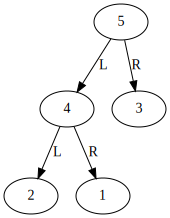

In [3]:
# Creación del árbol y aplicación del recorrido Preorder.
bt = BinaryTree()
for key in [5, 4, 3 ,2, 1]:  # Inserta nodos en el árbol.
    bt.insert(key)

# Visualizar el árbol
dot = visualize_bt(bt)
dot

In [4]:
# Aplica el recorrido por Niveles y almacena el resultado.
level_order_result = bt.level_order_traversal()

# Define el resultado esperado del recorrido por Niveles del árbol dado.
expected_result = [5, 4, 3, 2, 1]

# Realiza la comprobación.
print("Prueba de Recorrido por Niveles:")
print("Resultado obtenido:", level_order_result)
print("Resultado esperado:", expected_result)
assert level_order_result == expected_result, "El recorrido por Niveles no coincide con el esperado."
print("La prueba del recorrido por Niveles se ha completado con éxito.")


Prueba de Recorrido por Niveles:
Resultado obtenido: [5, 4, 3, 2, 1]
Resultado esperado: [5, 4, 3, 2, 1]
La prueba del recorrido por Niveles se ha completado con éxito.


## Complejidad del Algoritmo

- **Complejidad de Tiempo:** O(N), donde N es el número de nodos en el árbol, ya que cada nodo se visita exactamente una vez.
- **Complejidad de Espacio:** O(N) en el peor de los casos, debido al almacenamiento de todos los nodos en un nivel en la cola.

## Ejercicios Prácticos

1. Modifica la función de recorrido por niveles para que imprima los nodos nivel por nivel en líneas separadas.
2. Escribe una función que utilice el recorrido por niveles para encontrar la altura de un árbol binario.
3. Implementa una variante del recorrido por niveles que visite los nodos en orden inverso, empezando por el nivel más bajo.
4. Crea una función que utilice el recorrido por niveles para serializar un árbol binario en una lista.

## Soluciones a los Ejercicios

1. **Modificación para imprimir nodos por nivel en líneas separadas:**

In [5]:
def print_level_order(self):
    """
    Imprime los nodos del árbol binario nivel por nivel en líneas separadas.
    """
    if not self.root:
        print("Árbol vacío.")
        return

    queue = deque([self.root])

    while queue:
        level_size = len(queue)

        while level_size > 0:
            node = queue.popleft()
            print(node.data, end=' ')

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

            level_size -= 1

        print()  # Nueva línea para separar los niveles

BinaryTree.print_level_order = print_level_order

2. **Función para encontrar la altura del árbol:**

In [6]:
def find_height(self):
    """
    Utiliza el recorrido por niveles para encontrar la altura del árbol binario.
    """
    if not self.root:
        return 0

    height = 0
    queue = deque([self.root])

    while queue:
        level_size = len(queue)
        height += 1

        while level_size > 0:
            node = queue.popleft()

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

            level_size -= 1

    return height

BinaryTree.find_height = find_height

3. **Variante del recorrido por niveles en orden inverso:**

In [7]:
def reverse_level_order_traversal(self):
    """
    Realiza un recorrido por niveles del árbol binario en orden inverso,
    empezando por el nivel más bajo.
    """
    if not self.root:
        return []

    result = deque()
    queue = deque([self.root])

    while queue:
        node = queue.popleft()
        result.appendleft(node.data)

        # Nota: Aquí se encola primero el derecho y luego el izquierdo.
        if node.right:
            queue.append(node.right)
        if node.left:
            queue.append(node.left)

    return list(result)

BinaryTree.reverse_level_order_traversal = reverse_level_order_traversal

4. **Función para serializar el árbol en una lista:**

In [8]:
def serialize(self):
    """
    Utiliza el recorrido por niveles para serializar el árbol binario en una lista.
    """
    if not self.root:
        return []

    result = []
    queue = deque([self.root])

    while queue:
        node = queue.popleft()

        if node:
            result.append(node.data)
            queue.append(node.left)
            queue.append(node.right)
        else:
            result.append(None)

    # Eliminar None adicionales al final
    while result[-1] is None:
        result.pop()

    return result

BinaryTree.serialize = serialize

Estas funciones extienden la clase `BinaryTree`, proporcionando capacidades adicionales para imprimir por niveles, calcular la altura, realizar un recorrido inverso y serializar el árbol.